 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\3491285301.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# Cleaning nulls from DataFrame by dropping
whale_df = whale_df.dropna().copy()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
#checking to see if nulls have been dropped 
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\401923736.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)

In [10]:
#check to see if nulls have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_returns = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\6733247.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\samus\AppData\Local\Temp\ipykernel_10448\6733247.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
# To Fix Data I want to Remove non-numeric mainly the $ characters and convert to float
sp500_df["Close"] = sp500_df["Close"].str.replace('[\$,]', '', regex=True).astype(float)


In [14]:
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [15]:
# Calculate Daily Returns
daily_returns_df = sp500_df.pct_change()
daily_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
# Drop nulls
daily_returns_df.dropna(inplace=True)

In [17]:
daily_returns_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [18]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_df.rename(columns={"Close": "sp500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([algo_df, whale_df,daily_returns_df], axis= 1, join='inner')
combined_returns_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

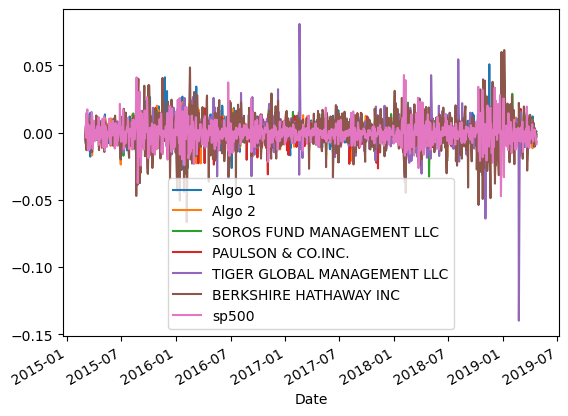

In [20]:
# Plot daily returns of all portfolios
combined_returns_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

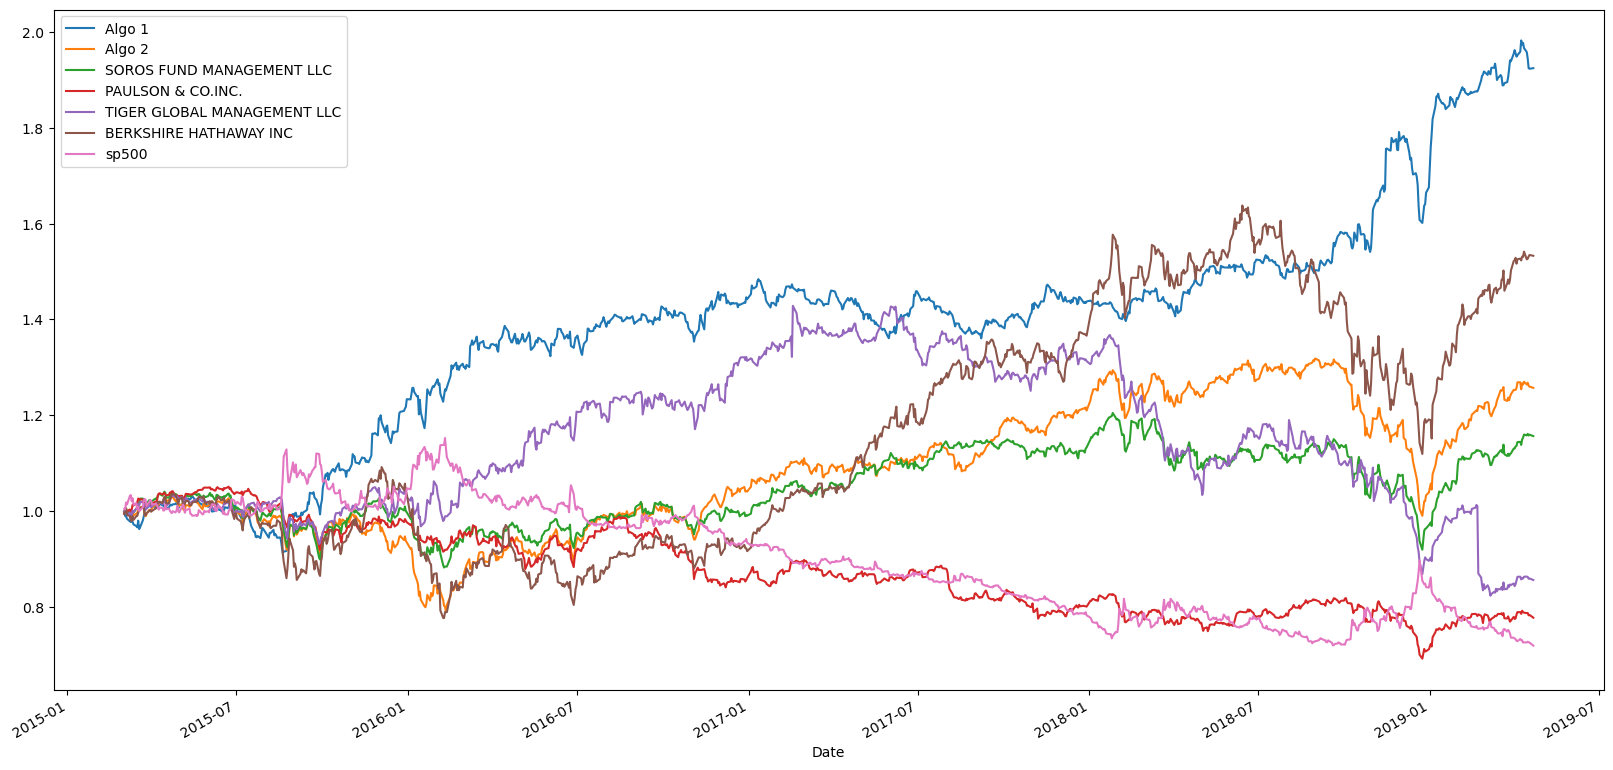

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod()
cumulative_returns


# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Combined Returns Risk')

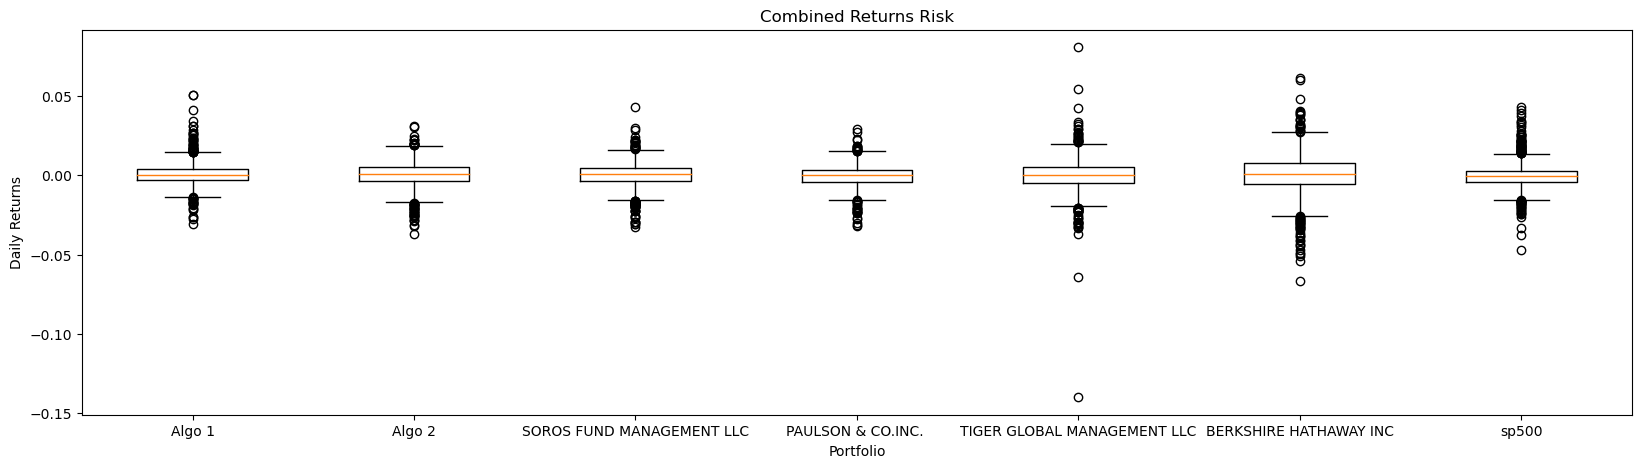

In [23]:
plt.figure(figsize=(20, 5))

# Box plot to visually show risk
plt.boxplot(combined_returns_df, labels=cumulative_returns.columns)

# Setting plot labels and title
plt.xlabel("Portfolio")
plt.ylabel("Daily Returns")
plt.title("Combined Returns Risk")

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns_df.std()
combined_returns_std

Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
sp500                          0.008587
dtype: float64

In [25]:
#sorting std for each portfolio
combined_returns_std = combined_returns_std.sort_values(ascending=False)
combined_returns_std.head(6)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
sp500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
dtype: float64

In [26]:
# Using the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
annual_volatility = combined_returns_df.std() * np.sqrt(252)
annual_volatility.sort_values(inplace=True)
annual_volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
sp500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
# daily_returns_df.std()
combined_returns_std['sp500']

# Determine which portfolios are riskier than the S&P 500
# Tiger Global Management and Berkshire Hathway are riskier than the S&P 500
combined_returns_std > combined_returns_std['sp500']

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
sp500                          False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_std = combined_returns_df.std() * np.sqrt(252)
daily_returns_std.sort_values(inplace=True)
daily_returns_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
sp500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

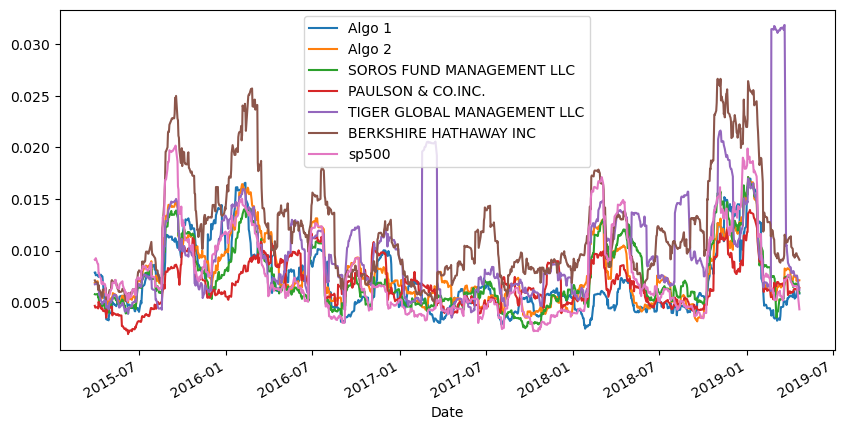

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation
correlation = combined_returns_df.corr()
# Display de correlation matrix
correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574
PAULSON & CO.INC.,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505
BERKSHIRE HATHAWAY INC,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856
sp500,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


<Axes: >

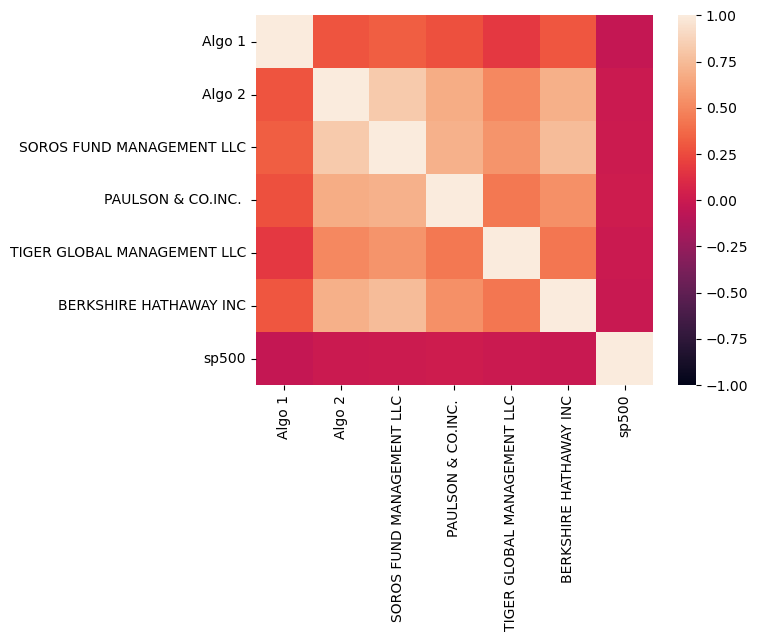

In [31]:
#providing a heatmap for more insight into correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: sp500, Length: 1042, dtype: float64

<Axes: xlabel='Date'>

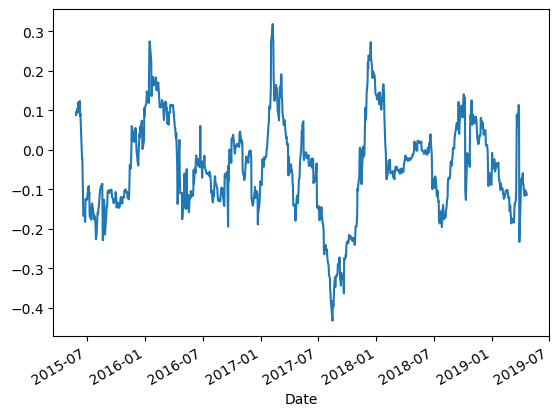

In [32]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df['Algo 1'].rolling(window=60).cov(combined_returns_df['sp500'])
display(covariance)
# Calculate variance of S&P 500
variance = combined_returns_df['sp500'].rolling(window=60).var()
display(variance)
# Computing beta
#beta = covariance/variance 
Algo_1_beta = covariance/variance 
Algo_1_beta
# Plot beta trend of Algo 1
Algo_1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [60]:
# Use `ewm` to calculate the rolling window
Ewm_DF=combined_returns_df.ewm(halflife=21).mean()
Ewm_DF

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,My_portfolio
Date,,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,NaN
2015-03-04,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089,0.001560,NaN
2015-03-05,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603,0.005975,NaN
2015-03-06,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256,0.003375,NaN
2015-03-09,-0.004400,-0.000935,-0.000511,0.000673,-0.000616,-0.002128,0.006337,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.001175,0.001313,0.001439,0.000450,-0.000813,0.001896,-0.001290,0.001848
2019-04-16,0.000912,0.001364,0.001480,0.000448,-0.000813,0.001862,-0.001174,0.001626
2019-04-17,0.000548,0.001150,0.001338,0.000223,-0.000930,0.001906,-0.001187,0.001260


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns_df.mean()- 0) * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
sp500                         -0.518582
My_portfolio                   0.365492
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

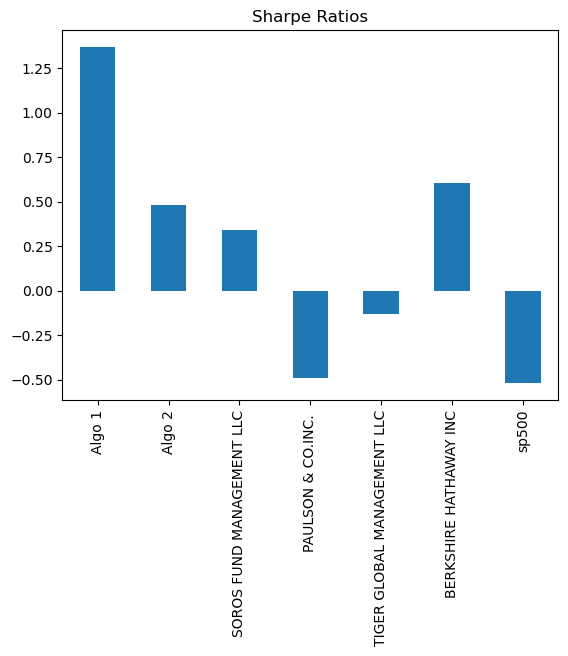

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 is certainly the best performing risk-adjusted strategy when looking at the Sharpe ratios of all provided portfolios. It has a Sharpe ratio of 1.369589 with the next closest portfolio being Berkshire Hathaway with a Sharpe ratio of 0.606743. Algo 2 on the other hand with its Sharpe ratio of 0.484334 is not as strong a performer as Algo 1 or Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
nvda_returns = Path("C://Users//samus//OneDrive//Desktop//Module_4//Resources//nvda_google_finance  - Sheet1.csv")
nvda_df = pd.read_csv(nvda_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\853205423.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda_df = pd.read_csv(nvda_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2018-10-08 16:00:00,66.44
2018-10-09 16:00:00,66.39
2018-10-10 16:00:00,61.42
2018-10-11 16:00:00,58.78
2018-10-12 16:00:00,61.64
2018-10-15 16:00:00,58.85
2018-10-16 16:00:00,61.46
2018-10-17 16:00:00,60.77
2018-10-18 16:00:00,59.88


In [37]:
nvda_df.rename(columns={"Close": "nvda_price"}, inplace=True)

In [38]:
# Reading data from 2nd stock
now_returns = Path("C://Users//samus//OneDrive//Desktop//Module_4//Resources//now_google_finance - Sheet1.csv")
now_df = pd.read_csv(now_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
now_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\2166117401.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  now_df = pd.read_csv(now_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2018-10-08 16:00:00,180.26
2018-10-09 16:00:00,181.41
2018-10-10 16:00:00,172.14
2018-10-11 16:00:00,174.97
2018-10-12 16:00:00,184.45
2018-10-15 16:00:00,180.91
2018-10-16 16:00:00,192.72
2018-10-17 16:00:00,190.26
2018-10-18 16:00:00,185.18


In [39]:
now_df.rename(columns={"Close": "now_price"}, inplace=True)

In [40]:
# Reading data from 3rd stock
nke_returns = Path("C://Users//samus//OneDrive//Desktop//Module_4//Resources//nke_google_finance - Sheet1.csv")
nke_df = pd.read_csv(nke_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
nke_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\2013155636.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nke_df = pd.read_csv(nke_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2018-10-08 16:00:00,80.23
2018-10-09 16:00:00,80.42
2018-10-10 16:00:00,74.94
2018-10-11 16:00:00,74.51
2018-10-12 16:00:00,75.91
2018-10-15 16:00:00,74.99
2018-10-16 16:00:00,77.48
2018-10-17 16:00:00,76.48
2018-10-18 16:00:00,75.60


In [41]:
nke_df.rename(columns={"Close": "nke_price"}, inplace=True)

In [42]:
# Reading data from 4th stock
lly_returns = Path("C://Users//samus//OneDrive//Desktop//Module_4//Resources//lly_google_finance - Sheet1.csv")
lly_df = pd.read_csv(lly_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
lly_df.head(50)

C:\Users\samus\AppData\Local\Temp\ipykernel_10448\1865270982.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  lly_df = pd.read_csv(lly_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2018-10-08 16:00:00,115.46
2018-10-09 16:00:00,115.45
2018-10-10 16:00:00,113.34
2018-10-11 16:00:00,107.91
2018-10-12 16:00:00,110.48
2018-10-15 16:00:00,110.62
2018-10-16 16:00:00,111.03
2018-10-17 16:00:00,113.59
2018-10-18 16:00:00,113.31


In [43]:
lly_df.rename(columns={"Close": "lly_price"}, inplace=True)

In [44]:
# Combine all stocks in a single DataFrame
my4_returns_df = pd.concat([now_df, nke_df,lly_df,nvda_df], axis= 1, join='inner')
# Reset Date index
my4_returns_df = my4_returns_df.reset_index()
my4_returns_df['Date'] = pd.to_datetime(my4_returns_df['Date']).dt.date


In [45]:
my4_returns_df.head()

,Date,now_price,nke_price,lly_price,nvda_price
0,2018-10-08,180.26,80.23,115.46,66.44
1,2018-10-09,181.41,80.42,115.45,66.39
2,2018-10-10,172.14,74.94,113.34,61.42
3,2018-10-11,174.97,74.51,107.91,58.78
4,2018-10-12,184.45,75.91,110.48,61.64


In [62]:

my4_returns_df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [63]:
# Reorganize portfolio data by having a column per symbol
#did this after reading data in
my4_returns_df

,now_price,nke_price,lly_price,nvda_price
Date,,,,
2018-10-08,180.26,80.23,115.46,66.44
2018-10-09,181.41,80.42,115.45,66.39
2018-10-10,172.14,74.94,113.34,61.42
2018-10-11,174.97,74.51,107.91,58.78
2018-10-12,184.45,75.91,110.48,61.64
...,...,...,...,...
2023-10-02,555.23,94.56,538.29,447.82
2023-10-03,541.24,95.09,525.19,435.17
2023-10-04,548.64,95.89,531.46,440.41


In [64]:
# Calculate daily returns
my_daily_returns = my4_returns_df.pct_change()
my_daily_returns
# Drop NAs
my_daily_returns.dropna(inplace=True)
# Display sample data
my_daily_returns

,now_price,nke_price,lly_price,nvda_price
Date,,,,
2018-10-09,0.006380,0.002368,-0.000087,-0.000753
2018-10-10,-0.051100,-0.068142,-0.018276,-0.074861
2018-10-11,0.016440,-0.005738,-0.047909,-0.042983
2018-10-12,0.054181,0.018789,0.023816,0.048656
2018-10-15,-0.019192,-0.012120,0.001267,-0.045263
...,...,...,...,...
2023-10-02,-0.006673,-0.011086,0.002160,0.029495
2023-10-03,-0.025197,0.005605,-0.024336,-0.028248
2023-10-04,0.013672,0.008413,0.011939,0.012041


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
portfolio_returns = (my_daily_returns * weights).sum(axis=1)
# Display sample data
portfolio_returns

Date
2018-10-09    0.001977
2018-10-10   -0.053095
2018-10-11   -0.020047
2018-10-12    0.036361
2018-10-15   -0.018827
                ...   
2023-10-02    0.003474
2023-10-03   -0.018044
2023-10-04    0.011516
2023-10-05    0.007456
2023-10-06    0.026605
Length: 1255, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df['My_portfolio'] = portfolio_returns
all_returns_df = combined_returns_df


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,My_portfolio
Date,,,,,,,,
2018-10-09,-0.010405,-0.000001,0.001613,-0.000649,-0.012482,-0.003111,0.033981,0.001977
2018-10-10,-0.002851,-0.025833,-0.029343,-0.010970,-0.015193,-0.053816,0.021005,-0.053095
2018-10-11,0.004698,-0.016033,-0.012847,-0.013790,-0.027131,0.001485,-0.014007,-0.020047
2018-10-12,0.016796,0.005038,0.010741,0.006281,0.009289,0.031262,0.005940,0.036361
2018-10-15,-0.011152,0.001695,0.001587,0.002778,0.004125,-0.004768,-0.021043,-0.018827
...,...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.003687
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.004880
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.009517


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
daily_std = all_returns_df.std()
daily_std
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
sp500                          0.136313
My_portfolio                   0.318834
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

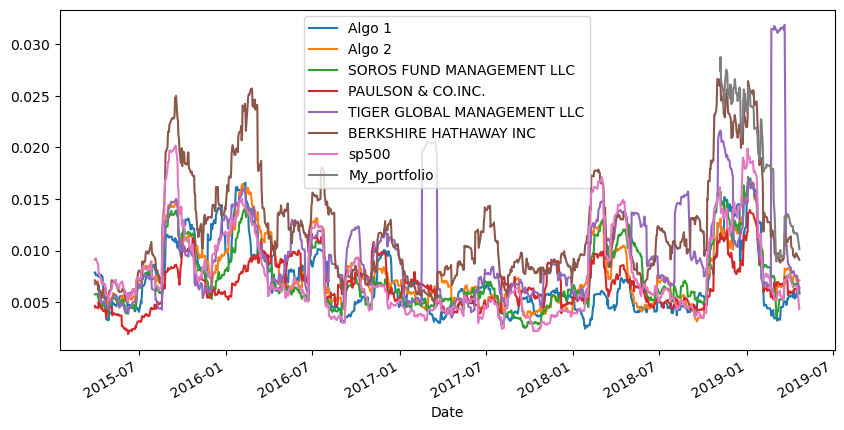

In [53]:
# Calculate rolling standard deviation
all_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_df.rolling(window=21).std().plot(figsize=(10,5))



### Calculate and plot the correlation

In [54]:

# Calculate the crrelation
correlation_2 = all_returns_df.corr()
# Display the correlation matrix
correlation_2

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,My_portfolio
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963,0.317990
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192,0.779031
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574,0.799419
PAULSON & CO.INC.,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549,0.645398
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505,0.352724
BERKSHIRE HATHAWAY INC,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856,0.848959
sp500,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.001320
My_portfolio,0.317990,0.779031,0.799419,0.645398,0.352724,0.848959,-0.001320,1.000000


<Axes: >

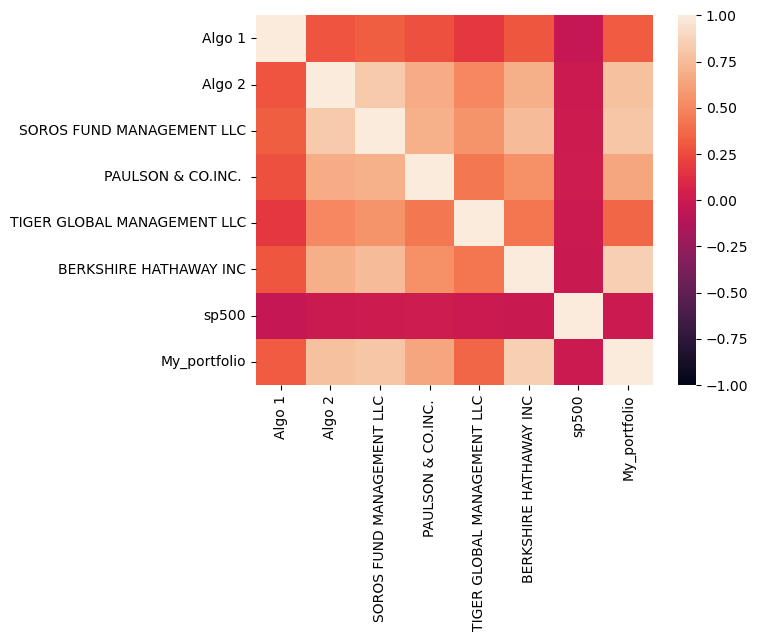

In [65]:
sns.heatmap(correlation_2, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: sp500, Length: 1042, dtype: float64

<Axes: xlabel='Date'>

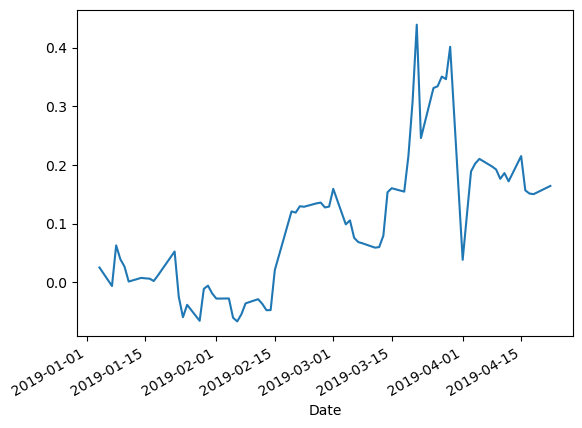

In [66]:
# Calculate covariance of a single portfolio
covariance_1 = portfolio_returns.rolling(window=60).cov(combined_returns_df['sp500'])
display(covariance)
# Calculate variance of S&P 500
variance = combined_returns_df['sp500'].rolling(window=60).var()
display(variance)
# Computing beta
#beta = covariance/variance 
my4_beta = covariance_1/variance 
my4_beta.dropna(inplace=True)
# Plot beta trend of Algo 1
my4_beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_1 = ((all_returns_df.mean()-0) * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios_1

Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
sp500                         -0.518582
My_portfolio                   0.365492
dtype: float64

In [68]:
sharpe_ratios2 = ((portfolio_returns.mean()-0)* 252)/ (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios2

1.0710145508344184

<Axes: title={'center': 'Sharpe Ratios'}>

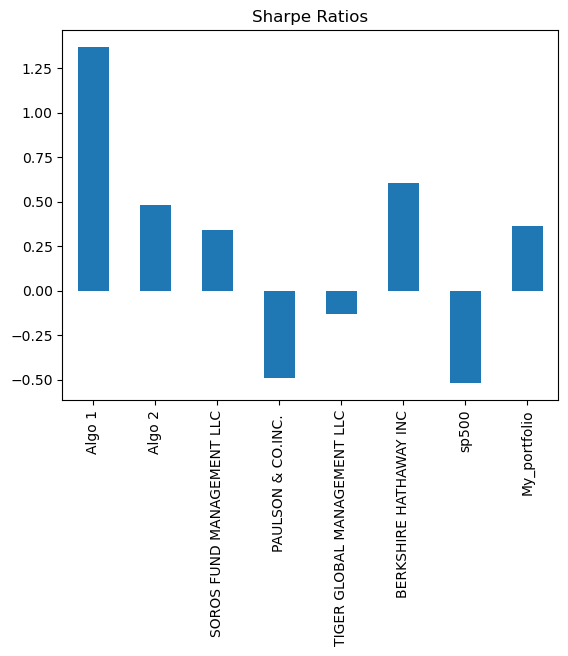

In [59]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

My portfolio did ok not the best with a Sharpe Ratio of 0.365492. 